<a href="https://colab.research.google.com/github/Coresight-Adithya/Automated-Projections/blob/main/Personal%20care%20IRI%20US/Prophet%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from prophet import Prophet
from pandas.tseries.offsets import MonthEnd
import pandas as pd
import numpy as np
from datetime import datetime

In [15]:
data_url ="https://raw.githubusercontent.com/Coresight-Adithya/Automated-Projections/main/Personal%20care%20IRI%20US/Personal%20Care%20Total.csv" 
data_name = "Personal care ecom"
df = pd.read_csv(data_url)
print(df)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.columns = ['ds', 'y']
df['y'] = df['y'].astype(float)
df = df.dropna()

          Date   Sales 
0   31-01-2016   8066.1
1   28-02-2016   8492.3
2   27-03-2016   8740.5
3   24-04-2016   8675.1
4   22-05-2016   8734.5
..         ...      ...
79  20-02-2022  11903.4
80  20-03-2022  12543.8
81  17-04-2022  12886.6
82  15-05-2022  12864.8
83  12-06-2022  13101.7

[84 rows x 2 columns]


In [16]:
dates = pd.DataFrame(pd.date_range("01-31-2016", periods=91, freq="4W"))

In [17]:
dates.to_csv("dates.csv")

In [18]:
# COVID Outliers
covid_outlier_st = datetime.strptime('2020-03-01', '%Y-%m-%d').date()
covid_outlier_en = datetime.strptime('2020-05-31', '%Y-%m-%d').date()

df.loc[(df['ds'].dt.date >= covid_outlier_st) & (df['ds'].dt.date <= covid_outlier_en), 'y'] = None

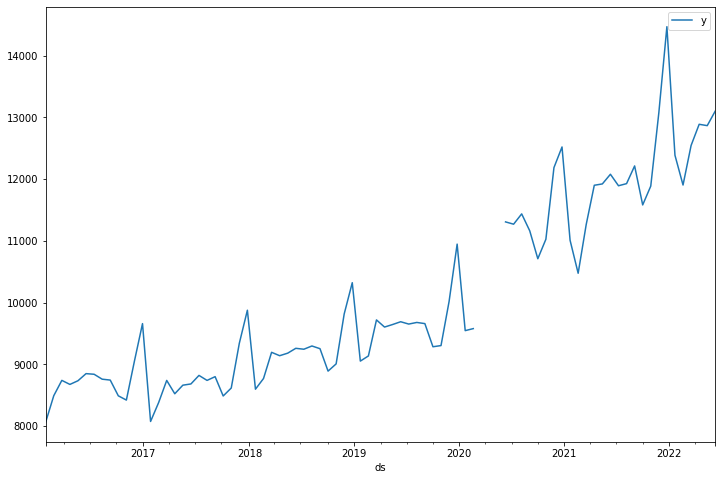

In [19]:
df.plot(x='ds', y='y', figsize=(12,8))

In [20]:
# Facebook Prophet Model
model = Prophet(seasonality_mode='multiplicative', daily_seasonality=False, weekly_seasonality=False)
model.fit(df)

10:47:00 - cmdstanpy - INFO - Chain [1] start processing
10:47:00 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
# Make future dates
future = model.make_future_dataframe(periods=68, freq='4W')
future = future[future['ds'].dt.year <= datetime.now().year+6]
future

,ds
0,2016-01-31
1,2016-02-28
2,2016-03-27
3,2016-04-24
4,2016-05-22
...,...
147,2027-05-09
148,2027-06-06
149,2027-07-04
150,2027-08-01


In [22]:
# Forecast
forecast = model.predict(future)

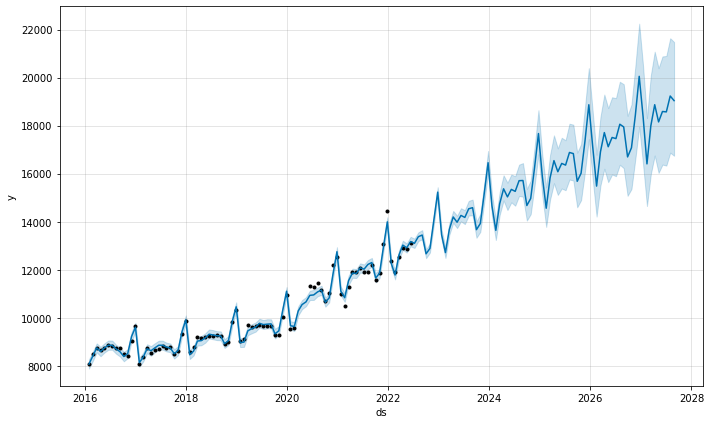

In [24]:
model.plot(forecast);

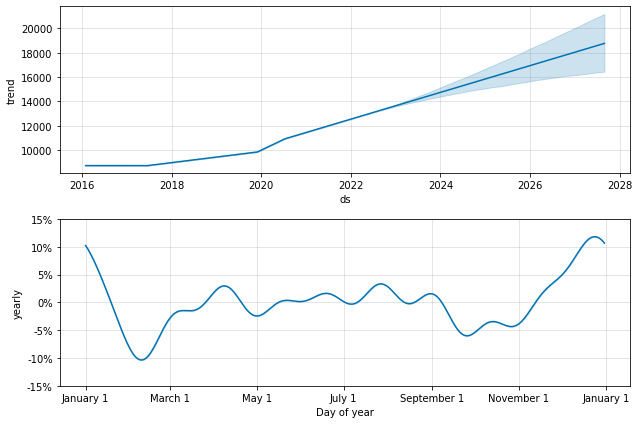

In [25]:
model.plot_components(forecast);

In [26]:
data_name = "personal care Total"
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].to_csv(data_name+'-Prophet-Predictions.csv')